# Human Evaluation

In this notebook we focus on parsing, aggregating and forming useful insights on the human evaluation output.

In [13]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.set_palette("deep")

In [14]:
EVALUATED_PATH = "../storage/results/human_evaluation/cordis/out/cordis_with_query_t5_small_full_totto.json"

with open(EVALUATED_PATH) as f:
    evaluations = json.load(f)

## Count per category

In [15]:
evaluation_choices = [evaluation['evaluation'].split(',') for evaluation in evaluations]
flattened_choices = [flattened_evaluation for evaluation in evaluation_choices for flattened_evaluation in evaluation]

summed_choices = Counter(flattened_choices)
print(summed_choices)

Counter({'Erroneous': 26, 'Correct': 17, 'Omission': 10, 'Hallucination': 4})


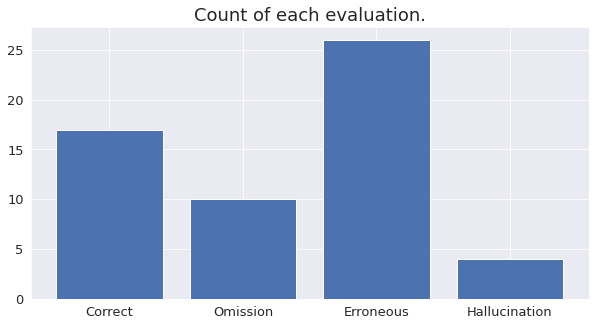

In [16]:
plt.figure(figsize=(10,5))

plt.bar(summed_choices.keys(), summed_choices.values())
plt.title("Count of each evaluation.")
plt.show()

## Inference examples

In [25]:
category = "Correct"

for evaluation in evaluations:
    if category in evaluation['evaluation']:
        print("-"*100)
        print(f"Target: {evaluation['target']}")
        print(f"Predicted: {evaluation['predicted']}")
        print(f"Source: {evaluation['source']}")
        print("-"*100)

----------------------------------------------------------------------------------------------------
Target: FlexiSTAT started in 2013 and ended in 2015.
Predicted: FlexiSTAT started in 2013 and ended in 2015.
Source: <page_title> nan </page_title> <section_title> When were the starting and ending years of teh project with acronym FlexiSTAT?  </section_title> <table> <cell> FlexiSTAT <col_header> acronym </col_header> </cell> <cell> 2013 <col_header> start_year </col_header> </cell> <cell> 2015 <col_header> end_year </col_header> </cell> </table>
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Target: The project with acronym GUIDENANO started on 2013.
Predicted: In 2013, GUIDENANO was launched.
Source: <page_title> projects </page_title> <section_title> When was the starting year of the project with acronym GUIDENANO? </section_title